In [3]:
"""
Created on Fri Jan  4 06:41:01 2019

@author: Jin Uk, Cho
"""

from IPython.display import set_matplotlib_formats, display
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# from preamble import *
from scipy import special
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [4]:

#그래프
display(mglearn.plots.plot_logistic_regression_graph())
display(mglearn.plots.plot_single_hidden_layer_graph())
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x), sigmoid(x)')

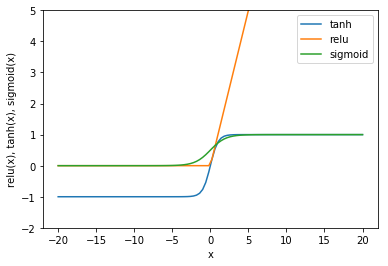

In [5]:
# Activation Function
line = np.linspace(-20, 20, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.plot(line, special.expit(np.array(line)), label="sigmoid")
plt.legend(loc="best")
plt.ylim([-2,5])
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x), sigmoid(x)")


In [6]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

Text(0, 0.5, 'Feature 1')

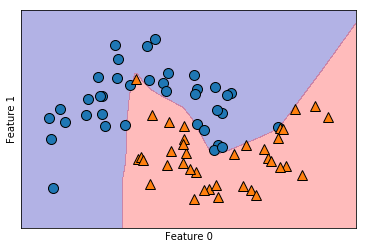

In [7]:
# 비교 1 1층, 노드 100개 비선형적인 매끄러운 경계
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

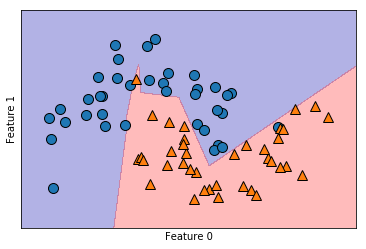

In [8]:
# 비교 2 1층 노드 10개 직선 10개로 나뉜 경계
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

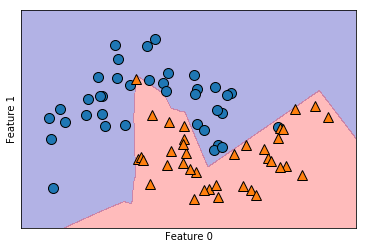

In [9]:
# 비교 3 using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

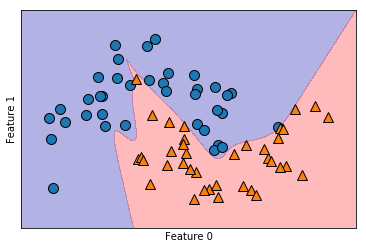

In [10]:
# 비교 4 using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

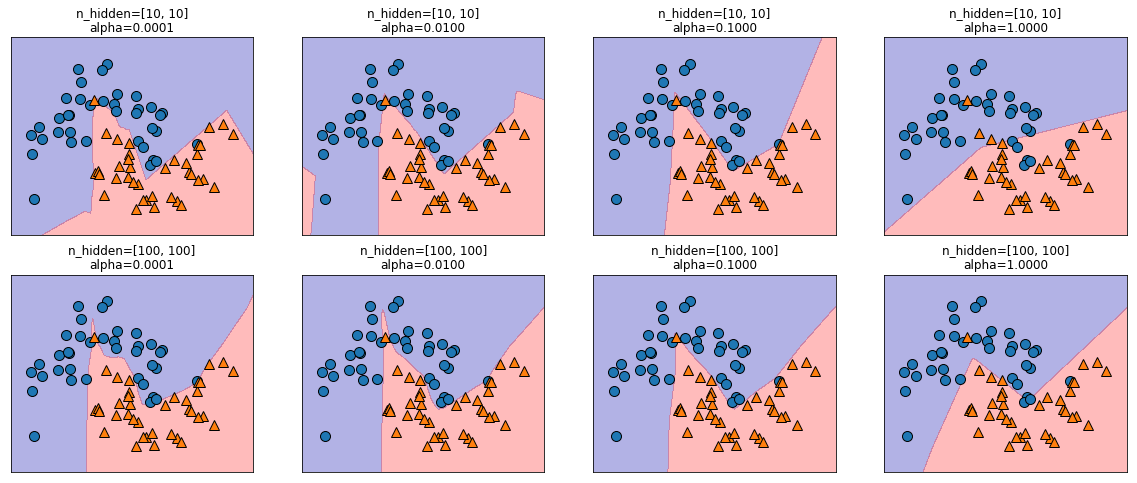

In [11]:
# 층의 노드 수와 복잡도 제어 (alpha) 에 따른 결정경계 차이
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
   for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
       mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
       mlp.fit(X_train, y_train)
       mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
       mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
       ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                     n_hidden_nodes, n_hidden_nodes, alpha))

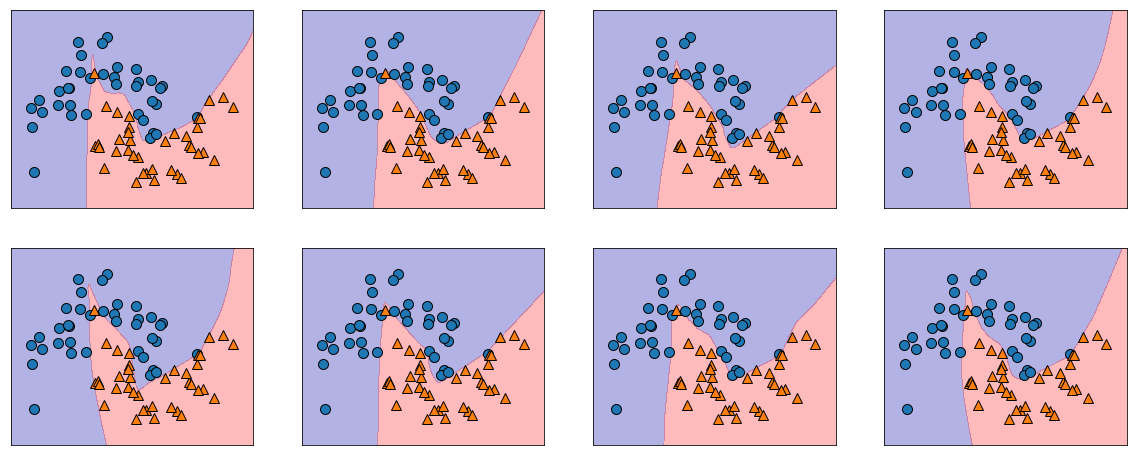

In [12]:
# 무작위 다른 초기값일 때(파라메터는 같음) 결정경계 차이
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
   mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
   mlp.fit(X_train, y_train)
   mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
   mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)


Created on Fri Jan  4 06:41:01 2019

@author: Jin Uk, Cho



Iteration 1, loss = 1.79553386


Iteration 2, loss = 0.79905939


Iteration 3, loss = 0.52126492


Iteration 4, loss = 0.43222735


Iteration 5, loss = 0.38608924


Iteration 6, loss = 0.35658339


Iteration 7, loss = 0.33471438


Iteration 8, loss = 0.31753261


Iteration 9, loss = 0.30350187


Iteration 10, loss = 0.29130842


Iteration 11, loss = 0.28059339


Iteration 12, loss = 0.27134187


Iteration 13, loss = 0.26271124


Iteration 14, loss = 0.25495203


Iteration 15, loss = 0.24801162


Iteration 16, loss = 0.24138905


Iteration 17, loss = 0.23521261


Iteration 18, loss = 0.22928120


Iteration 19, loss = 0.22416062


Iteration 20, loss = 0.21883601


Iteration 21, loss = 0.21396655


Iteration 22, loss = 0.20935535


Iteration 23, loss = 0.20503099


Iteration 24, loss = 0.20075087


Iteration 25, loss = 0.19669048


Iteration 26, loss = 0.19286717


Iteration 27, loss = 0.18913726


Iteration 28, loss = 0.18553755


Iteration 29, loss = 0.18207779


Iteration 30, loss = 0.17857268


Iteration 31, loss = 0.17545813


Iteration 32, loss = 0.17234722


Iteration 33, loss = 0.16956919


Iteration 34, loss = 0.16653716


Iteration 35, loss = 0.16376661


Iteration 36, loss = 0.16111604


Iteration 37, loss = 0.15850330


Iteration 38, loss = 0.15594490


Iteration 39, loss = 0.15345015


Iteration 40, loss = 0.15097944


Iteration 41, loss = 0.14854876


Iteration 42, loss = 0.14640459


Iteration 43, loss = 0.14426138


Iteration 44, loss = 0.14205491


Iteration 45, loss = 0.14001147


Iteration 46, loss = 0.13809261


Iteration 47, loss = 0.13616573


Iteration 48, loss = 0.13419670


Iteration 49, loss = 0.13247863


Iteration 50, loss = 0.13071204


Iteration 51, loss = 0.12895479


Iteration 52, loss = 0.12724354


Iteration 53, loss = 0.12554112


Iteration 54, loss = 0.12393073


Iteration 55, loss = 0.12240564


Iteration 56, loss = 0.12064726


Iteration 57, loss = 0.11920647


Iteration 58, loss = 0.11780597


Iteration 59, loss = 0.11630289


Iteration 60, loss = 0.11483354


Iteration 61, loss = 0.11357958


Iteration 62, loss = 0.11204189


Iteration 63, loss = 0.11073552


Iteration 64, loss = 0.10938875


Iteration 65, loss = 0.10813817


Iteration 66, loss = 0.10685369


Iteration 67, loss = 0.10556347


Iteration 68, loss = 0.10435533


Iteration 69, loss = 0.10318454


Iteration 70, loss = 0.10201751


Iteration 71, loss = 0.10098479


Iteration 72, loss = 0.09983516


Iteration 73, loss = 0.09866784


Iteration 74, loss = 0.09757966


Iteration 75, loss = 0.09649178


Iteration 76, loss = 0.09544654


Iteration 77, loss = 0.09451066


Iteration 78, loss = 0.09335082


Iteration 79, loss = 0.09244113


Iteration 80, loss = 0.09155908


Iteration 81, loss = 0.09042560


Iteration 82, loss = 0.08949069


Iteration 83, loss = 0.08853932


Iteration 84, loss = 0.08769540


Iteration 85, loss = 0.08674481


Iteration 86, loss = 0.08583338


Iteration 87, loss = 0.08490725


Iteration 88, loss = 0.08407992


Iteration 89, loss = 0.08330654


Iteration 90, loss = 0.08225985


Iteration 91, loss = 0.08157616


Iteration 92, loss = 0.08078702


Iteration 93, loss = 0.07984425


Iteration 94, loss = 0.07914505


Iteration 95, loss = 0.07835201


Iteration 96, loss = 0.07754759


Iteration 97, loss = 0.07683728


Iteration 98, loss = 0.07604484


Iteration 99, loss = 0.07547236


Iteration 100, loss = 0.07458141


Iteration 101, loss = 0.07389813


Iteration 102, loss = 0.07325417


Iteration 103, loss = 0.07247271


Iteration 104, loss = 0.07173940


Iteration 105, loss = 0.07106705


Iteration 106, loss = 0.07051307


Iteration 107, loss = 0.06973580


Iteration 108, loss = 0.06913703


Iteration 109, loss = 0.06847052


Iteration 110, loss = 0.06780548


Iteration 111, loss = 0.06728490


Iteration 112, loss = 0.06656597


Iteration 113, loss = 0.06594536


Iteration 114, loss = 0.06549975


Iteration 115, loss = 0.06491699


Iteration 116, loss = 0.06427887


Iteration 117, loss = 0.06364646


Iteration 118, loss = 0.06308341


Iteration 119, loss = 0.06252359


Iteration 120, loss = 0.06201337


Iteration 121, loss = 0.06144730


Iteration 122, loss = 0.06083077


Iteration 123, loss = 0.06037383


Iteration 124, loss = 0.05988761


Iteration 125, loss = 0.05940008


Iteration 126, loss = 0.05882946


Iteration 127, loss = 0.05827346


Iteration 128, loss = 0.05777200


Iteration 129, loss = 0.05722111


Iteration 130, loss = 0.05682451


Iteration 131, loss = 0.05632181


Iteration 132, loss = 0.05585704


Iteration 133, loss = 0.05539102


Iteration 134, loss = 0.05489800


Iteration 135, loss = 0.05445378


Iteration 136, loss = 0.05406321


Iteration 137, loss = 0.05356956


Iteration 138, loss = 0.05309252


Iteration 139, loss = 0.05262917


Iteration 140, loss = 0.05225570


Iteration 141, loss = 0.05179042


Iteration 142, loss = 0.05135328


Iteration 143, loss = 0.05083785


Iteration 144, loss = 0.05055658


Iteration 145, loss = 0.05016323


Iteration 146, loss = 0.04970664


Iteration 147, loss = 0.04928958


Iteration 148, loss = 0.04893329


Iteration 149, loss = 0.04857962


Iteration 150, loss = 0.04818391


Iteration 151, loss = 0.04775393


Iteration 152, loss = 0.04729671


Iteration 153, loss = 0.04702923


Iteration 154, loss = 0.04667869


Iteration 155, loss = 0.04626345


Iteration 156, loss = 0.04588736


Iteration 157, loss = 0.04552839


Iteration 158, loss = 0.04514881


Iteration 159, loss = 0.04475487


Iteration 160, loss = 0.04447125


Iteration 161, loss = 0.04407573


Iteration 162, loss = 0.04389170


Iteration 163, loss = 0.04341747


Iteration 164, loss = 0.04314599


Iteration 165, loss = 0.04280878


Iteration 166, loss = 0.04241744


Iteration 167, loss = 0.04216683


Iteration 168, loss = 0.04184644


Iteration 169, loss = 0.04141968


Iteration 170, loss = 0.04115722


Iteration 171, loss = 0.04084465


Iteration 172, loss = 0.04048802


Iteration 173, loss = 0.04014675


Iteration 174, loss = 0.03986113


Iteration 175, loss = 0.03955904


Iteration 176, loss = 0.03936763


Iteration 177, loss = 0.03899354


Iteration 178, loss = 0.03871507


Iteration 179, loss = 0.03836896


Iteration 180, loss = 0.03819398


Iteration 181, loss = 0.03789469


Iteration 182, loss = 0.03765170


Iteration 183, loss = 0.03725518


Iteration 184, loss = 0.03703716


Iteration 185, loss = 0.03675340


Iteration 186, loss = 0.03653349


Iteration 187, loss = 0.03621719


Iteration 188, loss = 0.03593479


Iteration 189, loss = 0.03560168


Iteration 190, loss = 0.03537075


Iteration 191, loss = 0.03513167


Iteration 192, loss = 0.03494339


Iteration 193, loss = 0.03464585


Iteration 194, loss = 0.03450377


Iteration 195, loss = 0.03407457


Iteration 196, loss = 0.03393867


Iteration 197, loss = 0.03366662


Iteration 198, loss = 0.03334659


Iteration 199, loss = 0.03318065


Iteration 200, loss = 0.03289354


Iteration 201, loss = 0.03269135


Iteration 202, loss = 0.03249376


Iteration 203, loss = 0.03223545


Iteration 204, loss = 0.03200621


Iteration 205, loss = 0.03176305


Iteration 206, loss = 0.03142770


Iteration 207, loss = 0.03124076


Iteration 208, loss = 0.03104142


Iteration 209, loss = 0.03077167


Iteration 210, loss = 0.03062193


Iteration 211, loss = 0.03037082


Iteration 212, loss = 0.03012883


Iteration 213, loss = 0.02993055


Iteration 214, loss = 0.02972751


Iteration 215, loss = 0.02942825


Iteration 216, loss = 0.02923746


Iteration 217, loss = 0.02916331


Iteration 218, loss = 0.02891010


Iteration 219, loss = 0.02869318


Iteration 220, loss = 0.02849422


Iteration 221, loss = 0.02829169


Iteration 222, loss = 0.02812606


Iteration 223, loss = 0.02789679


Iteration 224, loss = 0.02767629


Iteration 225, loss = 0.02748220


Iteration 226, loss = 0.02737265


Iteration 227, loss = 0.02706879


Iteration 228, loss = 0.02686671


Iteration 229, loss = 0.02671907


Iteration 230, loss = 0.02650971


Iteration 231, loss = 0.02637365


Iteration 232, loss = 0.02624388


Iteration 233, loss = 0.02597201


Iteration 234, loss = 0.02581314


Iteration 235, loss = 0.02568360


Iteration 236, loss = 0.02545898


Iteration 237, loss = 0.02524395


Iteration 238, loss = 0.02513284


Iteration 239, loss = 0.02492171


Iteration 240, loss = 0.02477017


Iteration 241, loss = 0.02461198


Iteration 242, loss = 0.02437111


Iteration 243, loss = 0.02426009


Iteration 244, loss = 0.02408443


Iteration 245, loss = 0.02392325


Iteration 246, loss = 0.02370996


Iteration 247, loss = 0.02355268


Iteration 248, loss = 0.02342620


Iteration 249, loss = 0.02324655


Iteration 250, loss = 0.02308345


Iteration 251, loss = 0.02293513


Iteration 252, loss = 0.02275993


Iteration 253, loss = 0.02264553


Iteration 254, loss = 0.02241814


Iteration 255, loss = 0.02228570


Iteration 256, loss = 0.02213788


Iteration 257, loss = 0.02200133


Iteration 258, loss = 0.02179712


Iteration 259, loss = 0.02166381


Iteration 260, loss = 0.02156611


Iteration 261, loss = 0.02141718


Iteration 262, loss = 0.02125417


Iteration 263, loss = 0.02113348


Iteration 264, loss = 0.02094210


Iteration 265, loss = 0.02079812


Iteration 266, loss = 0.02071125


Iteration 267, loss = 0.02053263


Iteration 268, loss = 0.02037561


Iteration 269, loss = 0.02031469


Iteration 270, loss = 0.02010986


Iteration 271, loss = 0.02001195


Iteration 272, loss = 0.01984227


Iteration 273, loss = 0.01975813


Iteration 274, loss = 0.01960834


Iteration 275, loss = 0.01940550


Iteration 276, loss = 0.01932346


Iteration 277, loss = 0.01921292


Iteration 278, loss = 0.01907789


Iteration 279, loss = 0.01896549


Iteration 280, loss = 0.01881045


Iteration 281, loss = 0.01873840


Iteration 282, loss = 0.01855005


Iteration 283, loss = 0.01847200


Iteration 284, loss = 0.01833170


Iteration 285, loss = 0.01823071


Iteration 286, loss = 0.01809057


Iteration 287, loss = 0.01800618


Iteration 288, loss = 0.01786720


Iteration 289, loss = 0.01777086


Iteration 290, loss = 0.01763059


Iteration 291, loss = 0.01749962


Iteration 292, loss = 0.01743092


Iteration 293, loss = 0.01730026


Iteration 294, loss = 0.01720893


Iteration 295, loss = 0.01706201


Iteration 296, loss = 0.01694684


Iteration 297, loss = 0.01684847


Iteration 298, loss = 0.01679703


Iteration 299, loss = 0.01662378


Iteration 300, loss = 0.01652385


Iteration 301, loss = 0.01641905


Iteration 302, loss = 0.01632757


Iteration 303, loss = 0.01622240


Iteration 304, loss = 0.01612110


Iteration 305, loss = 0.01601732


Iteration 306, loss = 0.01583770


Iteration 307, loss = 0.01578444


Iteration 308, loss = 0.01568419


Iteration 309, loss = 0.01560844


Iteration 310, loss = 0.01548772


Iteration 311, loss = 0.01539961


Iteration 312, loss = 0.01532945


Iteration 313, loss = 0.01523295


Iteration 314, loss = 0.01512556


Iteration 315, loss = 0.01501936


Iteration 316, loss = 0.01490157


Iteration 317, loss = 0.01482431


Iteration 318, loss = 0.01473822


Iteration 319, loss = 0.01461862


Iteration 320, loss = 0.01449231


Iteration 321, loss = 0.01446713


Iteration 322, loss = 0.01436588


Iteration 323, loss = 0.01427437


Iteration 324, loss = 0.01420454


Iteration 325, loss = 0.01407930


Iteration 326, loss = 0.01403257


Iteration 327, loss = 0.01393893


Iteration 328, loss = 0.01385228


Iteration 329, loss = 0.01371562


Iteration 330, loss = 0.01369385


Iteration 331, loss = 0.01358830


Iteration 332, loss = 0.01354610


Iteration 333, loss = 0.01340649


Iteration 334, loss = 0.01335245


Iteration 335, loss = 0.01327281


Iteration 336, loss = 0.01317495


Iteration 337, loss = 0.01309638


Iteration 338, loss = 0.01300317


Iteration 339, loss = 0.01297129


Iteration 340, loss = 0.01289361


Iteration 341, loss = 0.01278371


Iteration 342, loss = 0.01269425


Iteration 343, loss = 0.01263526


Iteration 344, loss = 0.01256289


Iteration 345, loss = 0.01248446


Iteration 346, loss = 0.01237208


Iteration 347, loss = 0.01233159


Iteration 348, loss = 0.01231009


Iteration 349, loss = 0.01215439


Iteration 350, loss = 0.01213493


Iteration 351, loss = 0.01203985


Iteration 352, loss = 0.01197875


Iteration 353, loss = 0.01190507


Iteration 354, loss = 0.01182925


Iteration 355, loss = 0.01177722


Iteration 356, loss = 0.01171273


Iteration 357, loss = 0.01164423


Iteration 358, loss = 0.01156227


Iteration 359, loss = 0.01149166


Iteration 360, loss = 0.01143063
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Training set score: 0.998833
Test set score: 0.976500


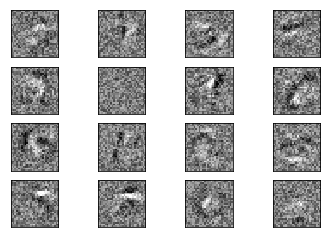

In [13]:
print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
   ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
              vmax=.5 * vmax)
   ax.set_xticks(())
   ax.set_yticks(())

plt.show()